<a href="https://colab.research.google.com/github/shaon11579/VAE-2021-/blob/main/18%20lt_200items_60k_students%20var_1007%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 Library used 

In [1]:
install.packages("tfprobability")
library(tfprobability)
library(tensorflow)
install.packages("devtools")
install.packages("usethis")
library(usethis)
install.packages("mvtnorm")
library(mvtnorm)
install.packages("CDM")
library(devtools)
library(keras)
library(CDM)
install.packages("ML2Pvae")
library(ML2Pvae)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘config’, ‘tfruns’, ‘tfautograph’, ‘here’, ‘png’, ‘zeallot’, ‘tensorflow’, ‘reticulate’, ‘keras’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘polycor’, ‘RcppArmadillo’


**********************************
** CDM 7.5-15 (2020-03-10 14:19:21)      
** Cognitive Diagnostic Models  **
**********************************


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# 18 lt 200items 60k student 


In [13]:
Q18<-read.csv("/18/Q_mat18.csv",header = T)
data<-read.csv("/18/response18.csv",header = T)
diff_true18c<-read.csv("/18/diff_true18bycol.csv",header = T)
diff_true18r<-read.csv("/18/diff_true18byrow.csv",header = T)
disc_true18<-read.csv("/18/diss_true18.csv",header = T)
theta_true18<-read.csv("/18/theta_true.csv",header = T)

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/18/diff_true18bycol.csv'”


In [4]:
Q14<-read.csv("/content/14/q14.csv",header = T)
data<-read.csv("/content/14/response14.csv",header = T)
diff_true14<-read.csv("/content/14/diff_true14.csv",header = T)
disc_true14<-read.csv("/content/14/dis_true14.csv",header = T)
theta_true14<-read.csv("/content/14/theta14.csv",header = T)


In [8]:
#M = (response) * Q
#M is (number of students  X  number of skills)
#Pearson correlation of columns of M, then you have a (num skills X num skills) matriox
#cor(M)
# estimated covariance matrix = cor(M)
M= 5000*14



ERROR: ignored

In [5]:
head(theta_true14)
str(theta_true14)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.47442703,-0.09722512,1.19950906,0.9366506,0.3911511,-0.161921647,2.3183119,0.72148201,-0.16515681,-0.22362964,-0.8253494,0.83897165,-1.06813081,-1.0405649
2,-0.17296381,-0.19359479,-0.07426737,-0.4214936,-0.5220973,-1.326122722,1.7812805,-0.22262227,1.26739250,-0.54356715,-0.7768415,0.94517649,1.09666946,0.7287073
3,0.15331462,-1.17091855,0.17119257,-0.5491793,-0.4378203,0.009444292,0.4516871,-1.24974701,-1.41522810,-0.71586589,-1.6579362,0.02989852,0.16037299,-0.2693794
4,0.02506632,-0.67115707,2.06624546,-0.1522682,-0.2036409,1.029672614,-0.3820603,0.35325213,1.52876046,-0.26200826,0.3086947,-1.11582637,0.08120418,0.3765366
5,0.78339422,1.75634585,-0.79915103,0.4247529,-0.4930525,0.156504901,1.4771275,0.05773777,0.57317814,-1.53562304,0.4405917,-0.13034739,1.02323507,-1.1881934
6,-1.34560528,-1.21518508,-0.25758204,-1.3932722,-2.1164989,-0.565556653,0.1824560,-0.60450989,-0.09728119,0.05455297,-0.5186808,0.40997944,1.01163992,-0.2226351


'data.frame':	5000 obs. of  14 variables:
 $ V1 : num  0.4744 -0.173 0.1533 0.0251 0.7834 ...
 $ V2 : num  -0.0972 -0.1936 -1.1709 -0.6712 1.7563 ...
 $ V3 : num  1.1995 -0.0743 0.1712 2.0662 -0.7992 ...
 $ V4 : num  0.937 -0.421 -0.549 -0.152 0.425 ...
 $ V5 : num  0.391 -0.522 -0.438 -0.204 -0.493 ...
 $ V6 : num  -0.16192 -1.32612 0.00944 1.02967 0.1565 ...
 $ V7 : num  2.318 1.781 0.452 -0.382 1.477 ...
 $ V8 : num  0.7215 -0.2226 -1.2497 0.3533 0.0577 ...
 $ V9 : num  -0.165 1.267 -1.415 1.529 0.573 ...
 $ V10: num  -0.224 -0.544 -0.716 -0.262 -1.536 ...
 $ V11: num  -0.825 -0.777 -1.658 0.309 0.441 ...
 $ V12: num  0.839 0.9452 0.0299 -1.1158 -0.1303 ...
 $ V13: num  -1.0681 1.0967 0.1604 0.0812 1.0232 ...
 $ V14: num  -1.041 0.729 -0.269 0.377 -1.188 ...


In [6]:
# Load data
data <- as.matrix(data)
Q <- as.matrix(Q18)




In [7]:
str(data)
str(Q)

 int [1:60000, 1:200] 0 1 0 0 1 1 1 0 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:200] "V1" "V2" "V3" "V4" ...
 int [1:18, 1:200] 1 0 0 0 0 0 0 1 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:200] "V1" "V2" "V3" "V4" ...


- We include a data set in the ML2Pvae package for demonstrative use.
- The data is from a simulated 30 item exam which assesses 3 latent traits. The latent abilities for 5000 students, found in the data frame theta_true, were sampled from N(0,Σ). Here, Σ specifies the correlations between the 3 abilities, and is found in the data frame correlation_matrix. 
- Discrimination and difficulty paramters were sampled uniformly from [0.25, 1.75] and [−3, 3] respectively, and entries in the Q-matrix were sampled from Bern(0.35). These values can be found in the data frames disc_true, diff_true, and q_matrix. Probabilities for each student answering each question correctly were calculated with the ML2P model [5]. These probabilities were sampled from to generate a response to each item on the assessment for each student. This is the main piece of data used for training, and is found in the data frame responses.

In [ ]:

foo <- matrix(rbinom(100*5,1,.35),ncol=30,nrow=400000)
foo3 <- matrix(rbinom(10*5,1,.35),ncol=30,nrow=3)
foo7 <- matrix(rbinom(10*5,1,.35),ncol=30,nrow=7)
foo14 <- matrix(rbinom(10*5,1,.35),ncol=30,nrow=14)
#
fooR <- matrix(rbinom(10*5,1,.35),ncol=30,nrow=5000)

Warning message in matrix(rbinom(10 * 5, 1, 0.35), ncol = 30, nrow = 3):
“data length [50] is not a sub-multiple or multiple of the number of rows [3]”
Warning message in matrix(rbinom(10 * 5, 1, 0.35), ncol = 30, nrow = 7):
“data length [50] is not a sub-multiple or multiple of the number of rows [7]”
Warning message in matrix(rbinom(10 * 5, 1, 0.35), ncol = 30, nrow = 14):
“data length [50] is not a sub-multiple or multiple of the number of rows [14]”


In [ ]:
disc_true <- runif(5000, min = 0.25, max = 1.75)
diff_true<- runif(5000, min = -3, max = 3)


Part 1 

In [ ]:
qqm <- read.csv("/content/q mat/Qmat2_30_1.csv")
data <- read.csv("/content/q mat/Qmat2_subset30.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/q mat/Qmat2_30_1.csv'”


In [ ]:
# Load data
data <- as.matrix(fooR)
Q <- as.matrix(foo7)

In [ ]:
head(data)

0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [ ]:
head(data)

                                                                            
1 function (..., list = character(), package = NULL, lib.loc = NULL,        
2     verbose = getOption("verbose"), envir = .GlobalEnv, overwrite = TRUE) 
3 {                                                                         
4     fileExt <- function(x) {                                              
5         db <- grepl("\\\\.[^.]+\\\\.(gz|bz2|xz)$", x)                     
6         ans <- sub(".*\\\\.", "", x)                                      

In [ ]:
summary(data)

       V1             V2             V3             V4             V5      
 Min.   :0.00   Min.   :0.00   Min.   :0.00   Min.   :0.00   Min.   :0.00  
 1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00  
 Median :0.00   Median :0.00   Median :0.00   Median :0.00   Median :0.00  
 Mean   :0.26   Mean   :0.26   Mean   :0.26   Mean   :0.26   Mean   :0.26  
 3rd Qu.:1.00   3rd Qu.:1.00   3rd Qu.:1.00   3rd Qu.:1.00   3rd Qu.:1.00  
 Max.   :1.00   Max.   :1.00   Max.   :1.00   Max.   :1.00   Max.   :1.00  
       V6             V7             V8             V9            V10      
 Min.   :0.00   Min.   :0.00   Min.   :0.00   Min.   :0.00   Min.   :0.00  
 1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00   1st Qu.:0.00  
 Median :0.00   Median :0.00   Median :0.00   Median :0.00   Median :0.00  
 Mean   :0.26   Mean   :0.26   Mean   :0.26   Mean   :0.26   Mean   :0.26  
 3rd Qu.:1.00   3rd Qu.:1.00   3rd Qu.:1.00   3rd Qu.:1.00   3rd Qu.:1.00  
 Max.   :1.0

In [ ]:
summary(data)

       V1               V2               V3               V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :1.0000   Median :0.0000  
 Mean   :0.0628   Mean   :0.2866   Mean   :0.6146   Mean   :0.1068  
 3rd Qu.:0.0000   3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:1.0000  
 Median :1.0000   Median :0.0000   Median :0.0000   Median :1.0000  
 Mean   :0.7524   Mean   :0.1352   Mean   :0.1964   Mean   :0.8288  
 3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9             V10         

In [ ]:
str(data)

 int [1:4199, 1:30] 0 1 0 1 1 1 1 0 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "V1" "V2" "V3" "V4" ...


In [ ]:
head(Q)

ERROR: ignored

In [8]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(50L, 25L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [9]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 200)]     0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 50)        10050    input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 25)        1275     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 18)        468      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 18)        468      hidden_2[0][0]             
________________________________________________________________________________
z (Conc

Model
Model: "model_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 18)]                    0           
________________________________________________________________________________
vae_out (Dense)                     (None, 200)                     3800        
Total params: 3,800
Trainable params: 3,800
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 200)]                   0           
________________________________________________________________________________
model (Functional)                  [(None, 18), (None, 18), (None, 12261       
________________________________________________________________________________
model_1 (Functional)                (None, 200)                     3800        
Total params: 16,061
Trainable params: 16,061
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Model 2: An ML2P-VAE model assuming correlation among traits is known
cov <- as.matrix(correlation_matrix) 
models_cor <- build_vae_correlated(num_items,
                                    num_skills,
                                              Q,
                                               model_type = 2,
                                               mean_vector = means,
                                               covariance_matrix = cov,
                                               enc_hid_arch = enc_arch,
                                                hid_enc_activations = enc_act,
                                                output_activation = out_act,
                                                kl_weight = kl)
encoder_cor <- models_cor[[1]]
decoder_cor <- models_cor[[2]]
vae_cor <- models_cor[[3]]
encoder_cor

ERROR: ignored

In [10]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 100
batch_size <- 50

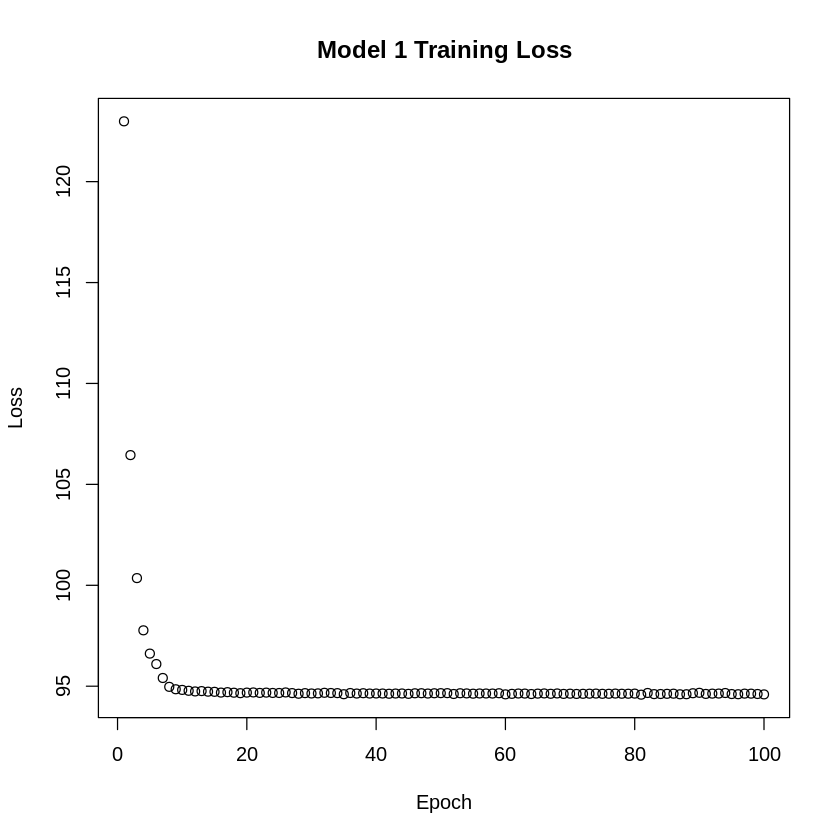

In [11]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [12]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

#diff_true7<-read.csv("/content/q/diff_true.csv")
#disc_true7<-read.csv("/content/q/disc_true 7.csv")
#theta_true7<-read.csv("/content/q/theta_true.csv")

In [ ]:
### save results

 write.csv(disc_est_ind,"/content/q mat/disc_est_ind.csv")
# write.csv(diff_estimates, file=paste('.\\results\\csv\\4_skills\\vae_ind_diff_', num_skills, 'skills.csv', sep=''))
# write.csv(all_skill_preds, file=paste('.\\results\\csv\\4_skills\\vae_ind_theta_', num_skills, 'skills.csv', sep=''))


In [14]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true18)
diff_true <- as.matrix(diff_true18c) 
theta_true<- as.matrix(theta_true18)

In [ ]:
write.csv(disc_true, '/content/Q/disc_true.csv')
write.csv(diff_true, '/content/Q/diff_true.csv')
write.csv(theta_true, '/content/Q/theta_true.csv')

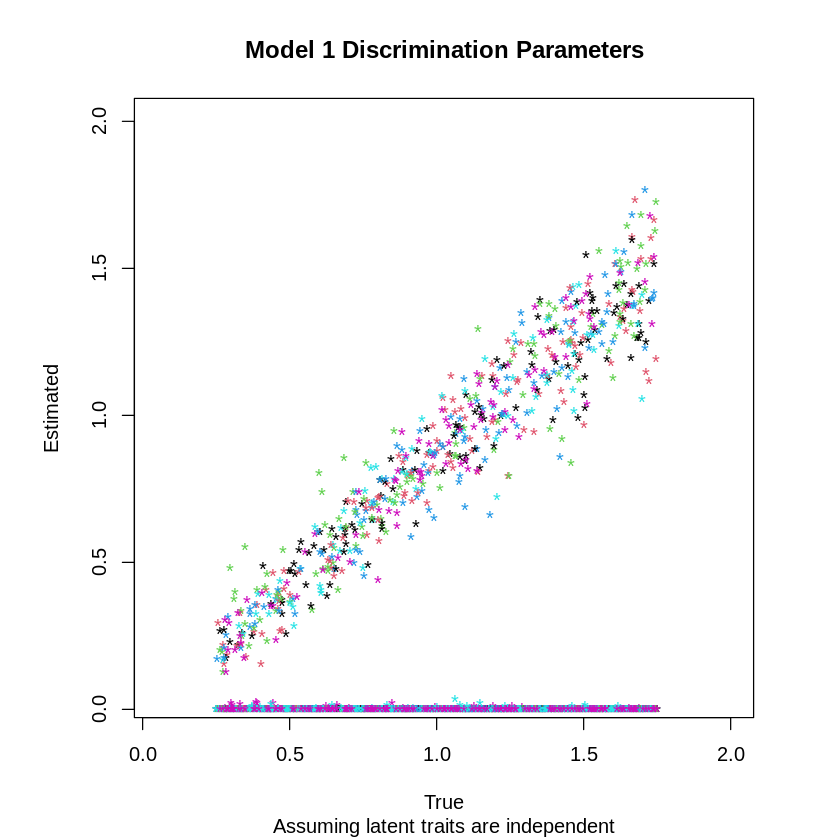

In [15]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')


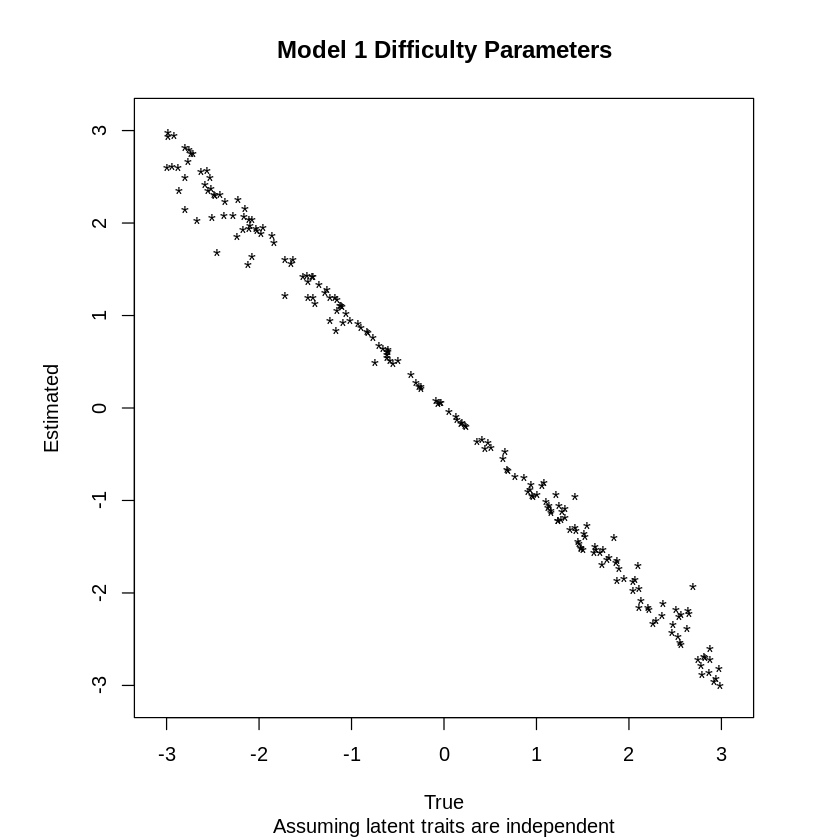

In [16]:
# Discrimination Parameters

par(pty="s")
plot(diff_true,diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

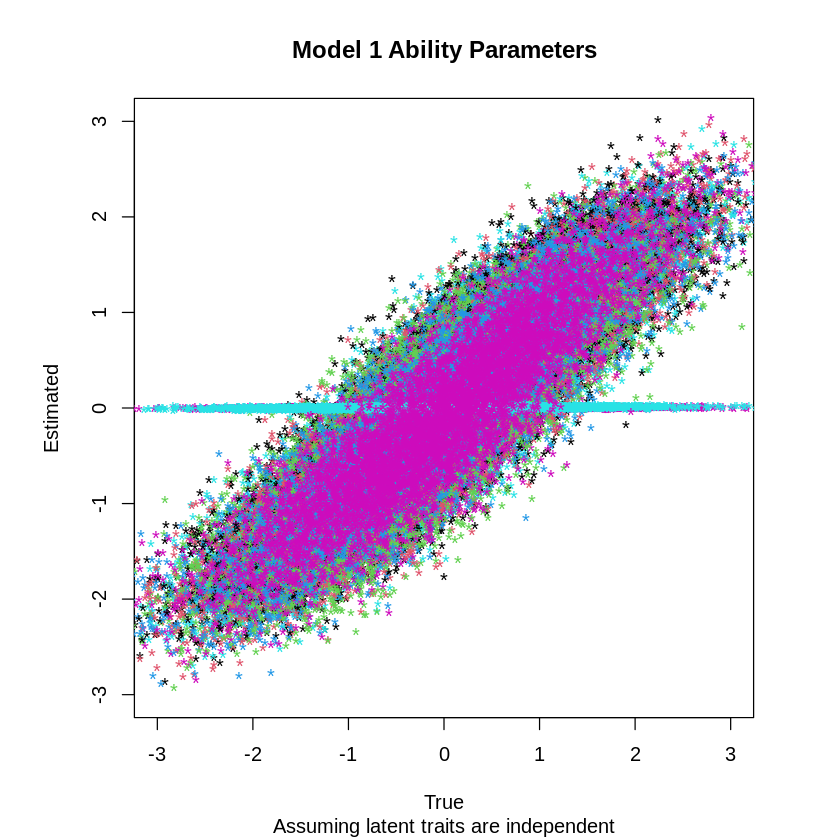

In [17]:
# Ability Parameters
par(pty="s")
matplot(theta_true[42000:48000,],
        all_theta_est_ind[42000:48000,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [3]:
# Importing the required package
install.packages("Metrics")
library(Metrics)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Calculating RMSE using rmse()         
result = rmse(all_theta_est_ind, theta_true14)
  
     

ERROR: ignored

In [ ]:
# Calculating RMSE using rmse()         
result = rmse( theta_true,disc_est_ind)
print(result)

In [30]:
print(result)

[1] NA


In [28]:
cor.test(theta_true,all_theta_est_ind)


	Pearson's product-moment correlation

data:  theta_true and all_theta_est_ind
t = 118.95, df = 69998, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.4038788 0.4162036
sample estimates:
      cor 
0.4100599 


#14 latent traits 

In [3]:
Q7<-read.csv("/content/7/Q7.csv",header = T)
data7<-read.csv("/content/7/response.csv",header = T)
diff_true7<-read.csv("/content/7/diff_true.csv",header = T)
disc_true7<-read.csv("/content/7/dis_true .csv",header = T)
theta_true7<-read.csv("/content/7/theta.csv",header = T)


Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/7/diff_true.csv'”


In [ ]:
qqm1 <- read.csv("/content/sample_data/QD.csv")
data1 <- read.csv("/content/sample_data/responses.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/sample_data/QD.csv'”


In [ ]:
head(qqm1)
head(data1)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,1,1,0,0,0,0,1,0,1,⋯,0,0,0,0,0,1,1,0,0,0
2,0,0,0,0,1,0,1,0,0,1,⋯,1,0,0,1,1,1,0,1,1,0
3,1,0,0,1,1,1,1,0,1,0,⋯,1,1,1,0,0,1,0,0,0,1


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,0,0,1,1,1,⋯,1,1,0,1,0,1,0,1,0,1
2,0,0,0,0,1,0,0,1,1,1,⋯,1,1,1,1,1,0,0,1,1,1
3,0,0,1,0,0,0,0,1,1,0,⋯,0,1,1,0,0,0,1,0,1,0
4,0,1,1,0,1,0,0,1,1,1,⋯,1,1,0,1,0,1,1,0,1,0
5,0,0,0,0,1,1,0,1,0,1,⋯,1,1,0,1,0,0,1,1,1,0
6,0,1,1,0,1,0,0,1,1,1,⋯,0,1,0,1,0,0,1,0,0,1


In [4]:
# Load data
data <- as.matrix(data7)
Q <- as.matrix(Q7)

In [5]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(50L, 25L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [9]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 50)        1550     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 25)        1275     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 7)         182      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 7)         182      hidden_2[0][0]             
________________________________________________________________________________
z (Conc

Model
Model: "model_1"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 7)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      240         
Total params: 240
Trainable params: 240
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_2"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model (Functional)                  [(None, 7), (None, 7), (None, 7 3189        
________________________________________________________________________________
model_1 (Functional)                (None, 30)                      240         
Total params: 3,429
Trainable params: 3,429
Non-trainable params: 0
________________________________________________________________________________



In [10]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 50
batch_size <- 25

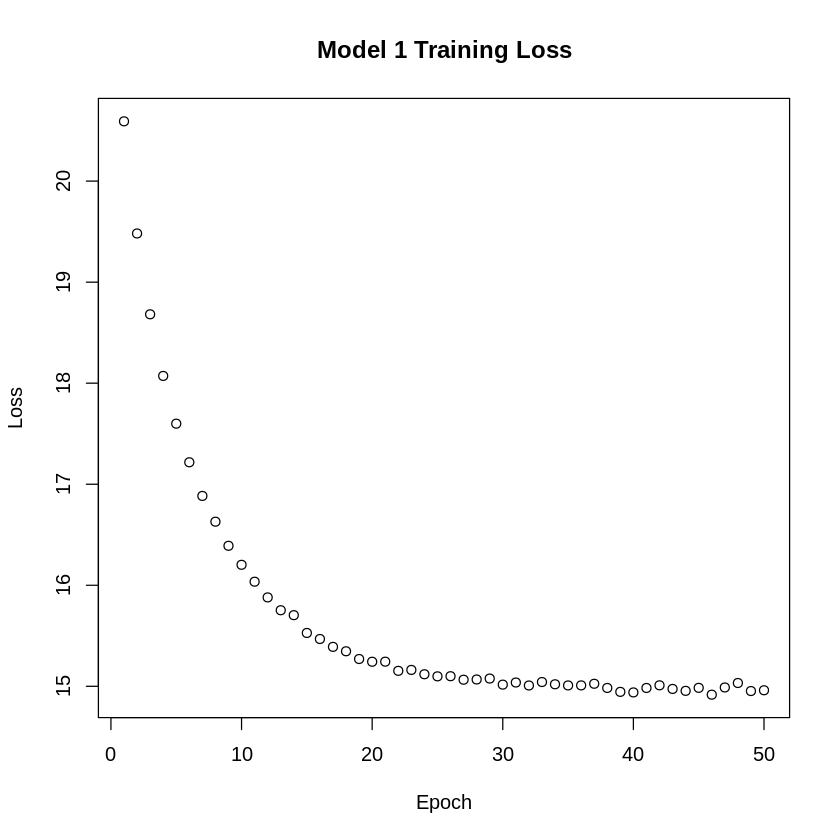

In [11]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [13]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [12]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true7)
diff_true <- as.matrix(diff_true7) 
theta_true<- as.matrix(theta_true7)

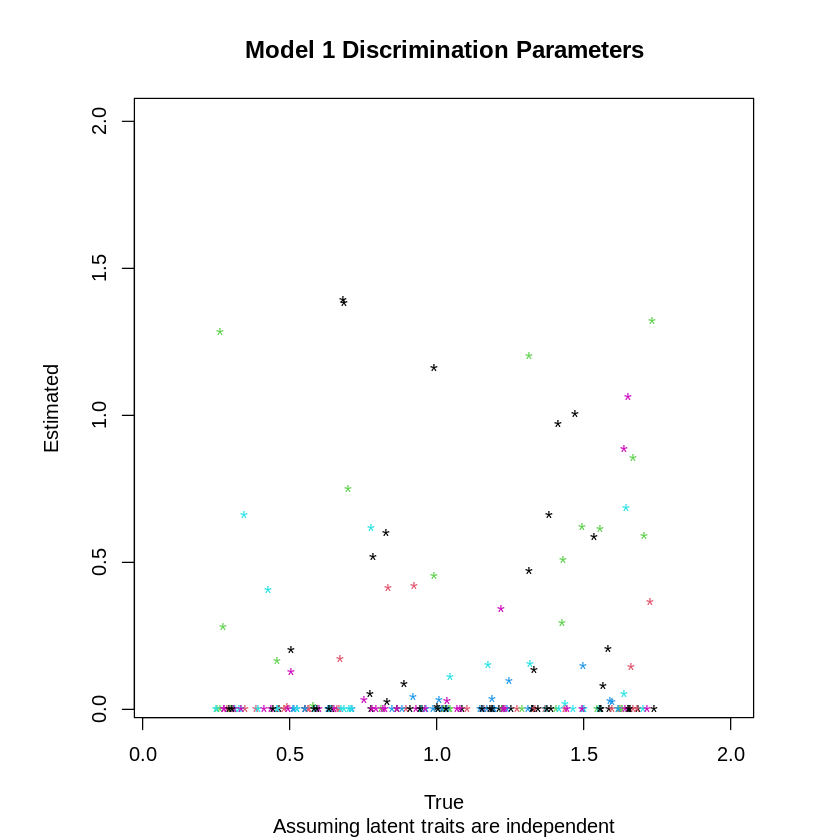

In [14]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

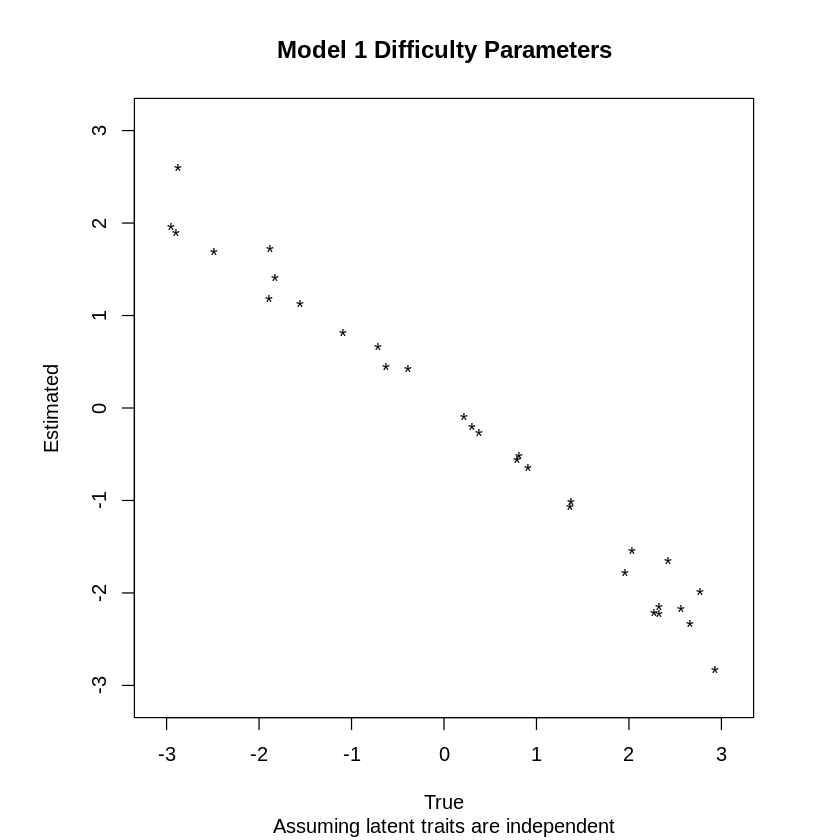

In [15]:
# Discrimination Parameters

par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

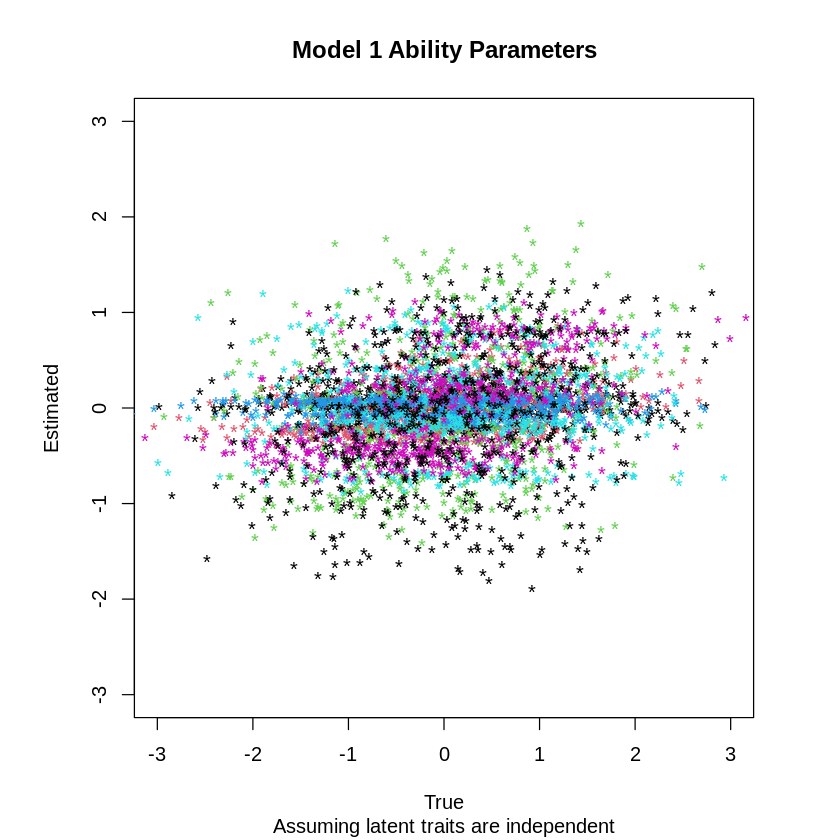

In [16]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [ ]:
qqm2 <- read.csv("/bin/qmat/Qmat2_sp_3c.csv")
data2 <- read.csv("/bin/qmat/Qmat2_subset_sp.csv")

In [ ]:
# Load data
data <- as.matrix(data2)
Q <- as.matrix(qqm2)

In [ ]:
head(data)
head(Q)

MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0038,MA_0039,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071
0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0038,MA_0039,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071
0,0,0,0,1,0,1,1,0,0,⋯,1,0,0,1,1,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,1,0,0,1,0
1,1,1,1,0,1,0,0,1,0,⋯,0,0,1,0,0,0,1,0,0,1
0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
0,1,0,0,0,0,0,0,0,0,⋯,1,0,0,0,0,0,1,0,0,1
1,0,1,1,1,1,1,1,1,1,⋯,0,1,1,1,1,1,0,1,1,0


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_6"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        496      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 32)        288      hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 32)        288      hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_7"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 32)]                    0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      990         
Total params: 990
Trainable params: 990
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_8"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model_6 (Functional)                [(None, 32), (None, 32), (None, 1208        
________________________________________________________________________________
model_7 (Functional)                (None, 30)                      990         
Total params: 2,198
Trainable params: 2,198
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

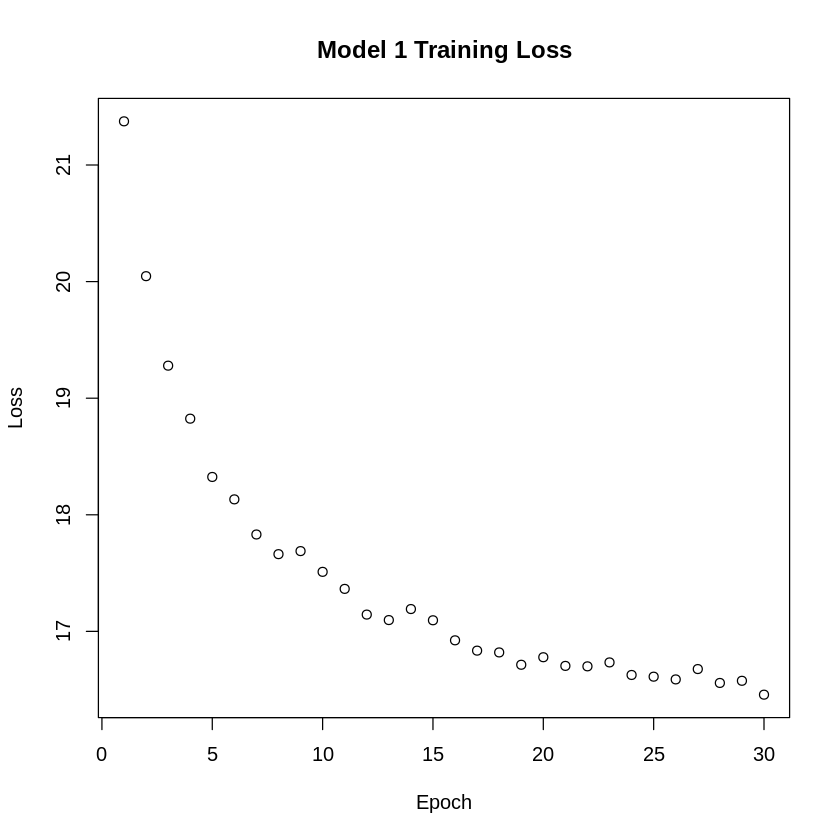

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

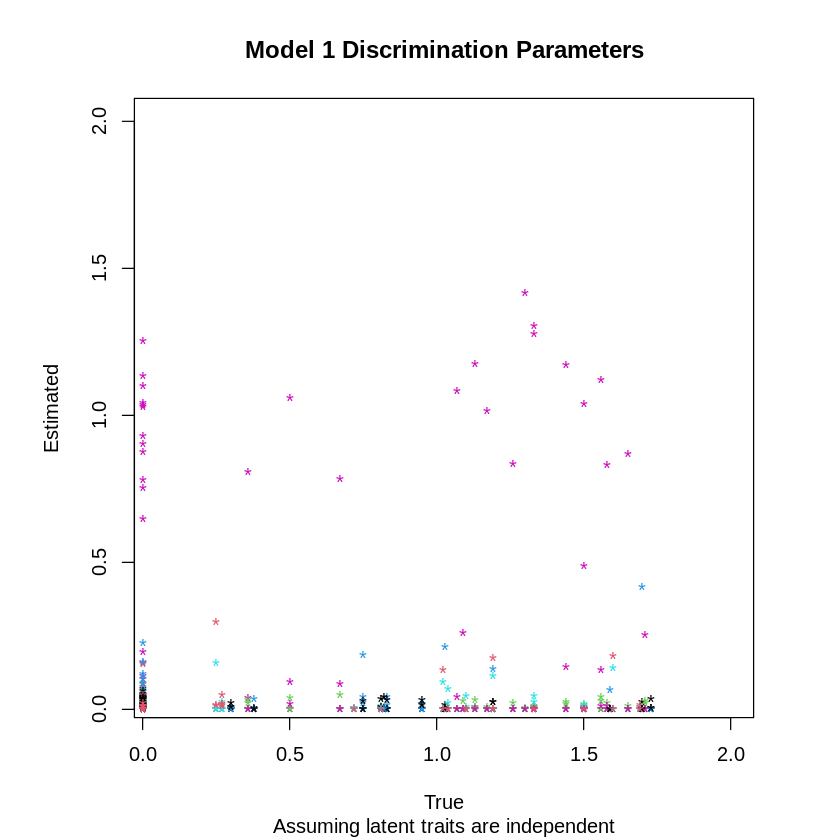

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

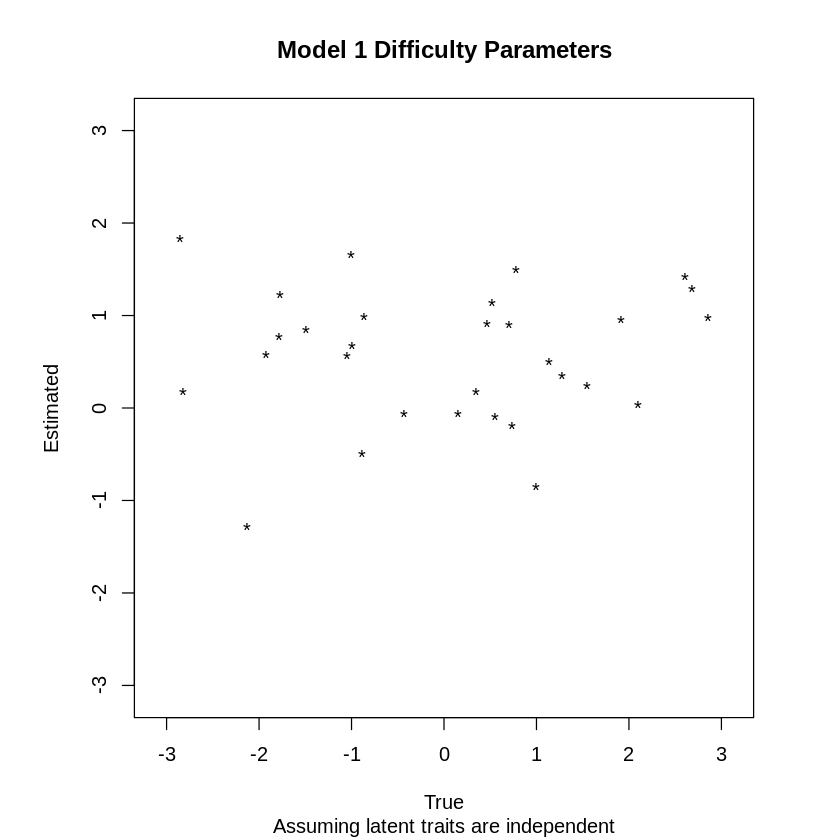

In [ ]:
par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

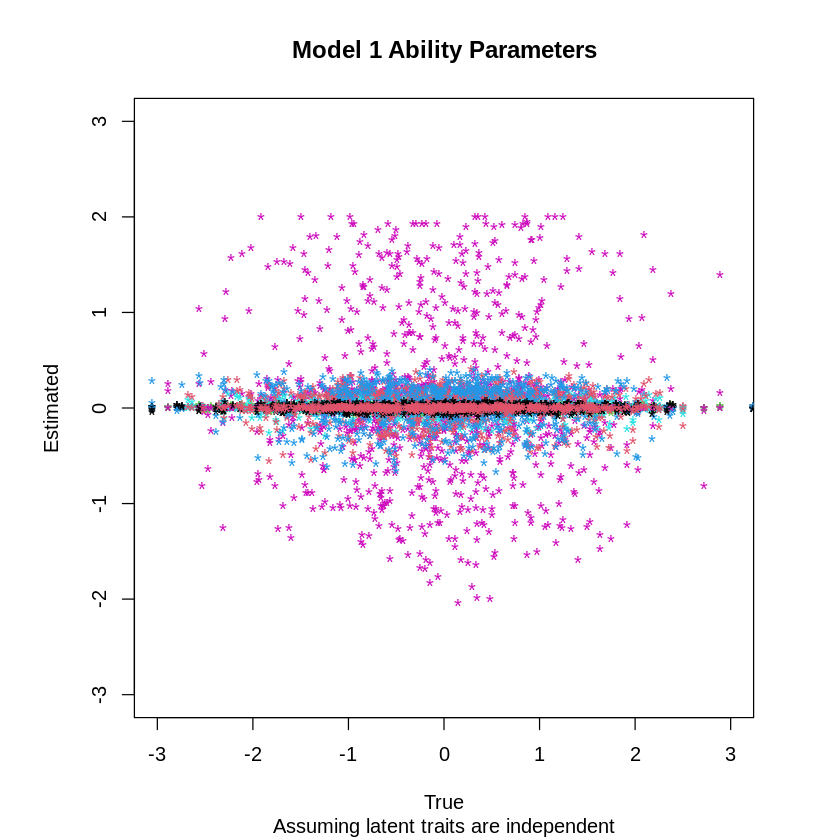

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [ ]:
qqm3 <- read.csv("/content/sample_data/Qmat2_sp_3c.csv")
data3 <- read.csv("/content/sample_data/Qmat2_subset_sp.csv")

Warning message in read.table(file = file, header = header, sep = sep, quote = quote, :
“incomplete final line found by readTableHeader on '/content/sample_data/Qmat2_sp_3c.csv'”


In [ ]:
# Load data
data <- as.matrix(data3)
Q <- as.matrix(qqm3)

In [ ]:
head(data)
str(data)
head(Q)
str(Q)

MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0038,MA_0039,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071
0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


 int [1:4199, 1:30] 0 1 0 1 1 1 1 0 1 1 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "MA_0011" "MA_0012" "MA_0014" "MA_0015" ...


MA_0011,MA_0012,MA_0014,MA_0015,MA_0016,MA_0018,MA_0020,MA_0022,MA_0024,MA_0025,⋯,MA_0038,MA_0039,MA_0064,MA_0065,MA_0066,MA_0067,MA_0068,MA_0069,MA_0070,MA_0071
0,0,0,0,1,0,1,1,0,0,⋯,1,0,0,1,1,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,⋯,0,1,0,0,0,1,0,0,1,0
1,1,1,1,0,1,0,0,1,0,⋯,0,0,1,0,0,0,1,0,0,1


 int [1:3, 1:30] 0 0 1 0 0 1 0 0 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "MA_0011" "MA_0012" "MA_0014" "MA_0015" ...


In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(16L, 8L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_9"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 16)        496      input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 8)         136      hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 3)         27       hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 3)         27       hidden_2[0][0]             
________________________________________________________________________________
z (Co

Model
Model: "model_10"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 3)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      120         
Total params: 120
Trainable params: 120
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_11"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model_9 (Functional)                [(None, 3), (None, 3), (None, 3 686         
________________________________________________________________________________
model_10 (Functional)               (None, 30)                      120         
Total params: 806
Trainable params: 806
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 30
batch_size <- 16

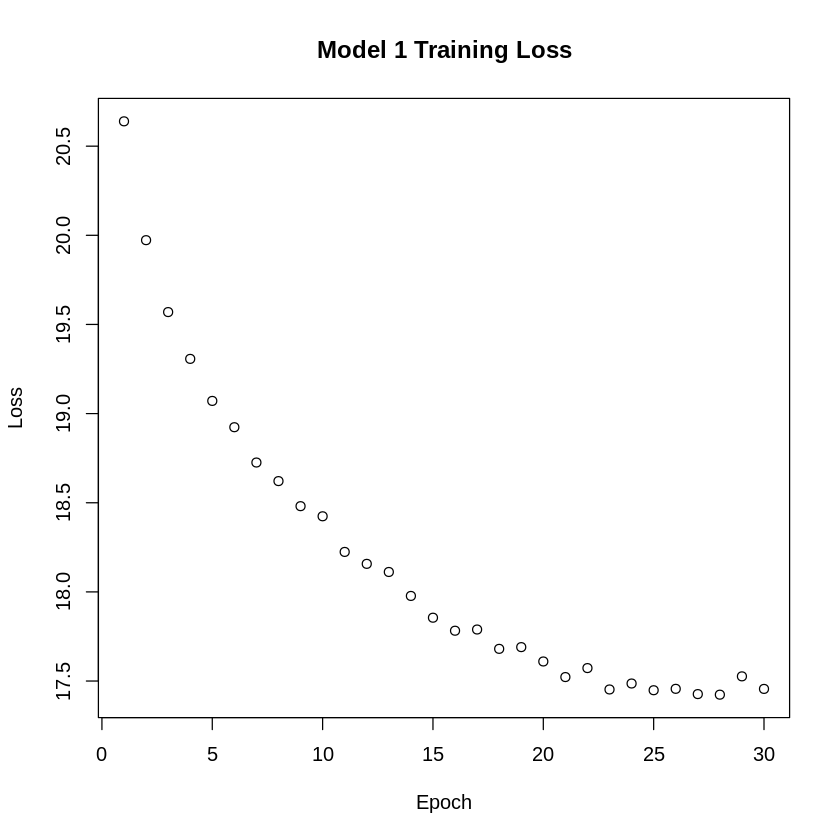

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

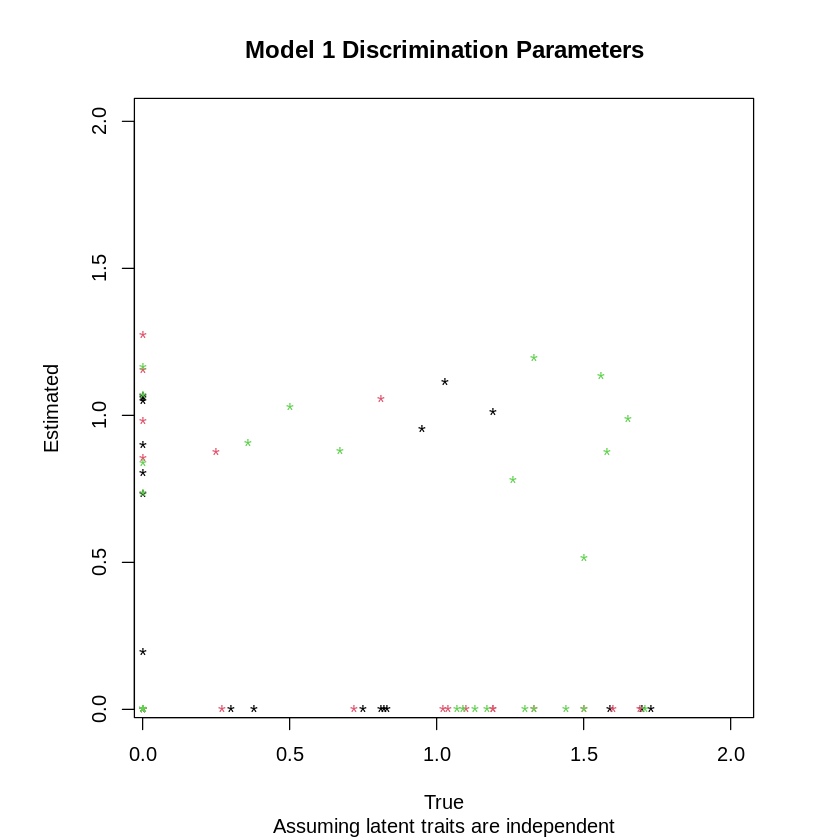

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

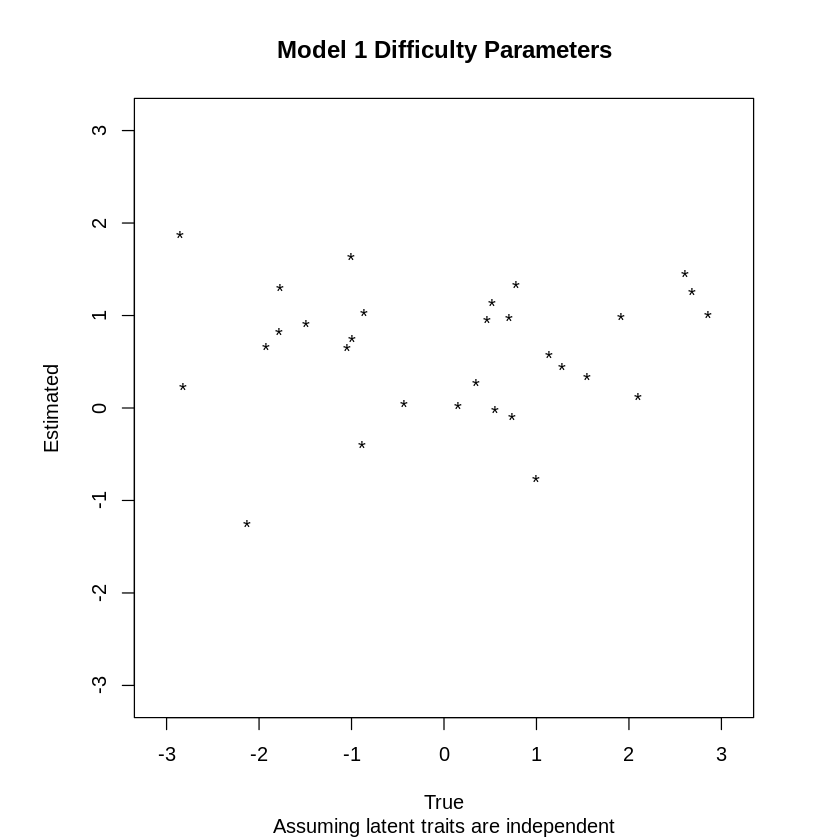

In [ ]:
# Difficulty parameter 
par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

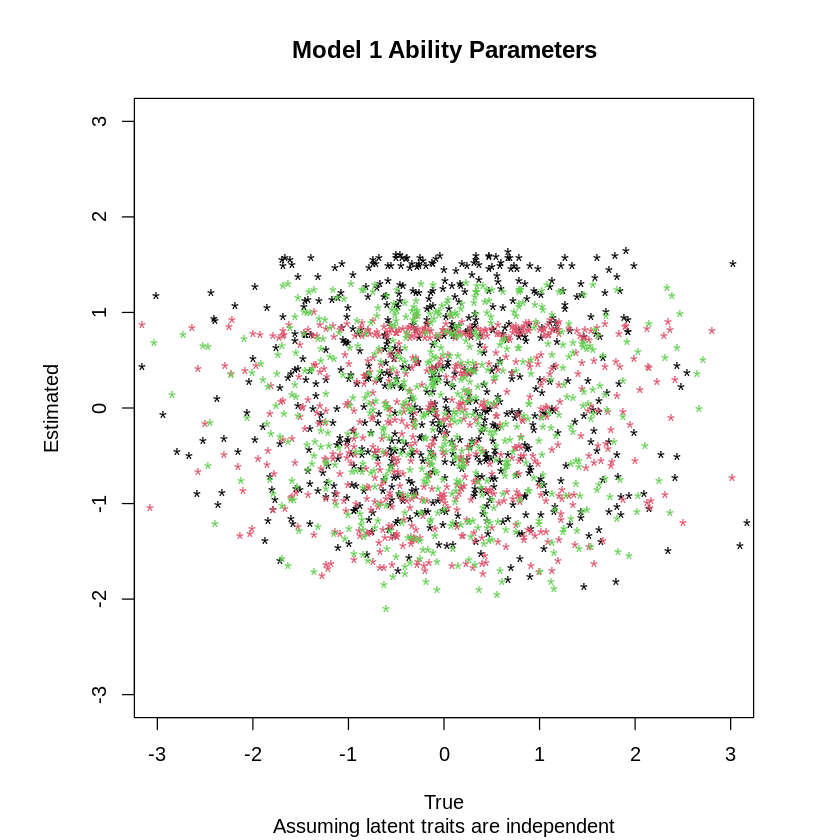

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[1200:1800,],
        all_theta_est_ind[1200:1800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

In [ ]:
qqm3 <- read.csv("/bin/qmat/Qmat2_sp_3c.csv")
data3 <- read.csv("/bin/qmat/Qmat2_subset_sp.csv")

Warning message in file(file, "rt"):
“cannot open file '/bin/qmat/Qmat2_sp_3c.csv': No such file or directory”


ERROR: ignored

In [ ]:
# Load data
data <- as.matrix(data3)
Q <- as.matrix(qqm3)

In [ ]:
head(data3)
summary(data3)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,1,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,0,1,1,1,1,1,1
3,0,1,1,0,1,0,0,0,0,1,⋯,0,1,1,0,0,0,0,1,0,0
4,1,0,0,0,1,0,1,0,0,0,⋯,0,0,0,1,1,0,0,0,1,0
5,1,1,0,0,0,0,0,1,1,1,⋯,0,0,1,1,1,1,1,0,0,0
6,1,1,1,0,1,1,0,0,1,1,⋯,0,1,1,0,1,1,0,1,1,1


       V1               V2               V3              V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.000   Min.   :0.0000  
 1st Qu.:1.0000   1st Qu.:0.0000   1st Qu.:0.000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :1.000   Median :1.0000  
 Mean   :0.8338   Mean   :0.6602   Mean   :0.708   Mean   :0.5568  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:1.000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :1.0000   Median :1.0000   Median :0.0000   Median :1.0000  
 Mean   :0.5344   Mean   :0.6411   Mean   :0.2336   Mean   :0.7061  
 3rd Qu.:1.0000   3rd Qu.:1.0000   3rd Qu.:0.0000   3rd Qu.:1.0000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9              V10              V

In [ ]:
str(Q)


 int [1:3, 1:30] 0 0 1 0 0 1 0 0 1 0 ...
 - attr(*, "dimnames")=List of 2
  ..$ : NULL
  ..$ : chr [1:30] "V1" "V2" "V3" "V4" ...


In [ ]:
summary(Q)

       V1               V2               V3               V4        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3333   Mean   :0.3333   Mean   :0.3333   Mean   :0.3333  
 3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V5               V6               V7               V8        
 Min.   :0.0000   Min.   :0.0000   Min.   :0.0000   Min.   :0.0000  
 1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000   1st Qu.:0.0000  
 Median :0.0000   Median :0.0000   Median :0.0000   Median :0.0000  
 Mean   :0.3333   Mean   :0.3333   Mean   :0.3333   Mean   :0.3333  
 3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000   3rd Qu.:0.5000  
 Max.   :1.0000   Max.   :1.0000   Max.   :1.0000   Max.   :1.0000  
       V9              V10        

In [ ]:
# Model parameters
num_items <- as.double(dim(Q)[2])
num_skills <- as.double(dim(Q)[1])
num_students <- dim(data)[1]
means <- rep(0,num_skills)
enc_arch <- c(64L, 32L)
enc_act <- c('relu', 'tanh')
out_act <- 'sigmoid'
kl <- 1

In [ ]:
#Model 1: An ML2P-VAE model assuming latent traits are independent

models_ind <- build_vae_independent(num_items, num_skills,
                                    Q,
                                    model_type = 2,
                                    enc_hid_arch = enc_arch,
                                    hid_enc_activation = enc_act,
                                    output_activation = out_act)
encoder_ind <- models_ind[[1]]
decoder_ind <- models_ind[[2]]
vae_ind <- models_ind[[3]]
encoder_ind
decoder_ind
vae_ind

Warning message in backcompat_fix_rename_lr_to_learning_rate(...):
“the `lr` argument has been renamed to `learning_rate`.”


Model
Model: "model_12"
________________________________________________________________________________
Layer (type)              Output Shape      Param #  Connected to               
input (InputLayer)        [(None, 30)]      0                                   
________________________________________________________________________________
hidden_1 (Dense)          (None, 64)        1984     input[0][0]                
________________________________________________________________________________
hidden_2 (Dense)          (None, 32)        2080     hidden_1[0][0]             
________________________________________________________________________________
z_mean (Dense)            (None, 3)         99       hidden_2[0][0]             
________________________________________________________________________________
z_log_var (Dense)         (None, 3)         99       hidden_2[0][0]             
________________________________________________________________________________
z (C

Model
Model: "model_13"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
latent_inputs (InputLayer)          [(None, 3)]                     0           
________________________________________________________________________________
vae_out (Dense)                     (None, 30)                      120         
Total params: 120
Trainable params: 120
Non-trainable params: 0
________________________________________________________________________________



Model
Model: "model_14"
________________________________________________________________________________
Layer (type)                        Output Shape                    Param #     
input (InputLayer)                  [(None, 30)]                    0           
________________________________________________________________________________
model_12 (Functional)               [(None, 3), (None, 3), (None, 3 4262        
________________________________________________________________________________
model_13 (Functional)               (None, 30)                      120         
Total params: 4,382
Trainable params: 4,382
Non-trainable params: 0
________________________________________________________________________________



In [ ]:
# Training parameters
num_train <- floor(0.8 * num_students)
num_test <- num_students - num_train
data_train <- data[1:num_train,]
data_test <- data[(num_train+1):num_students,]
num_epochs <- 10
batch_size <- 1

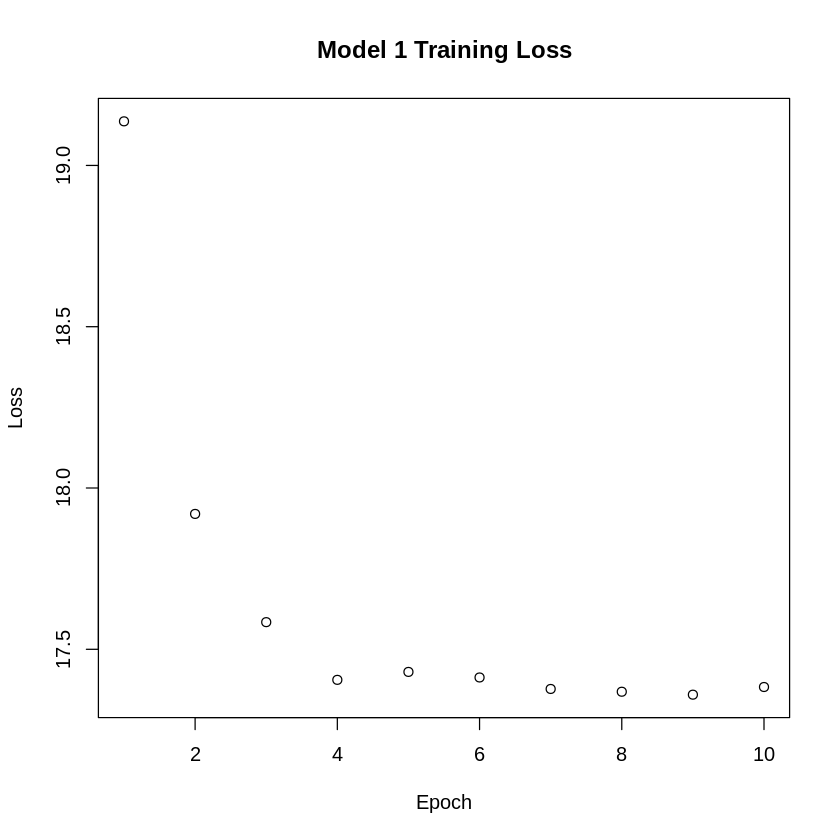

In [ ]:
# Train Model 1
history_ind <- train_model(vae_ind, data_train,
                           num_epochs = num_epochs,
                           batch_size = batch_size,
                           verbose = 1)

plot(history_ind,
     main = 'Model 1 Training Loss',
     sub = '',
     xlab = 'Epoch',
     ylab = 'Loss')

In [ ]:
# Get parameter estimates for Model 1
item_param_estimates_ind<- get_item_parameter_estimates(decoder_ind, model_type = 2)
diff_est_ind <- item_param_estimates_ind[[1]]
disc_est_ind <- item_param_estimates_ind[[2]]
test_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data_test)[[1]]
all_theta_est_ind <- get_ability_parameter_estimates(encoder_ind, data)[[1]]

In [ ]:
# Load in true values (included in this pacakge)
disc_true <- as.matrix(disc_true)
diff_true <- as.matrix(diff_true) 
theta_true<- as.matrix(theta_true)

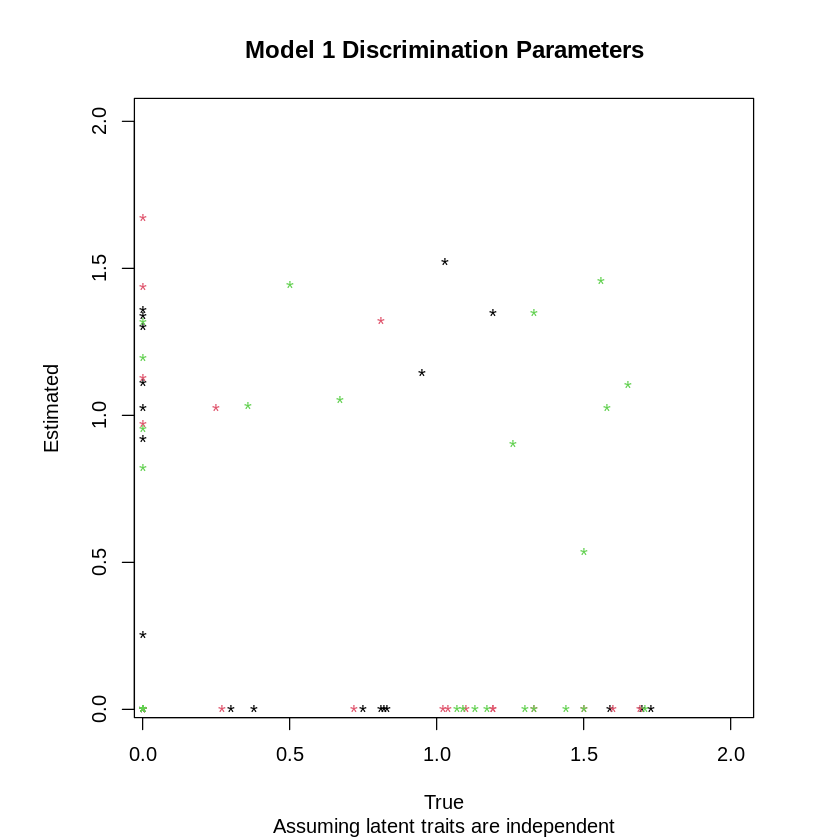

In [ ]:
# Examine Model 1 estimates
par(pty="s")
matplot(t(disc_true), t(disc_est_ind), pch = '*',
        xlim = c(0.05,2), ylim = c(0.05,2),
        main = 'Model 1 Discrimination Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

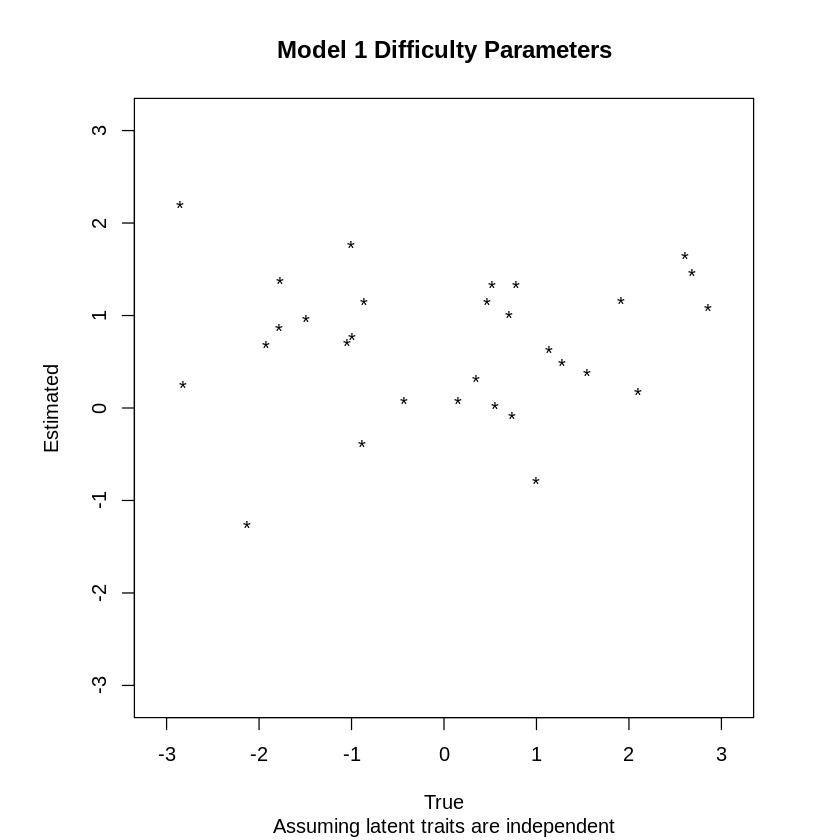

In [ ]:
# Difficulty parameter 
par(pty="s")
plot(diff_true, diff_est_ind, pch = '*',
     xlim = c(-3.1,3.1), ylim = c(-3.1,3.1),
     main = 'Model 1 Difficulty Parameters',
     sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')

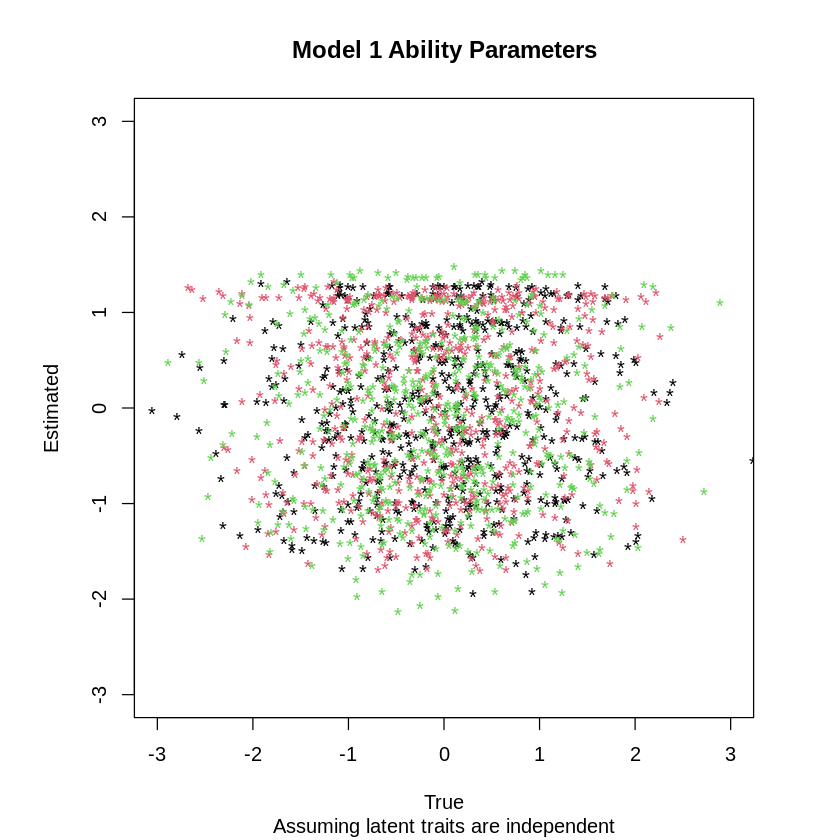

In [ ]:
# Ability Parameters
par(pty="s")
matplot(theta_true[3200:3800,],
        all_theta_est_ind[3200:3800,], pch = '*',
        xlim = c(-3,3), ylim = c(-3,3),
        main = 'Model 1 Ability Parameters',
        sub = 'Assuming latent traits are independent', xlab = 'True', ylab = 'Estimated')